# Missions pour cet exercice

- Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?
- Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.
-  Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).
- Déposez votre étude dans FUN


# Réponse sur Internet

Indiquez ici :
- le parcours que vous suivez (Jupyter, RStudio ou Orgmode),
- le sujet que vous avez choisi,
- éventuellement les problèmes que vous avez peut-être rencontrés et qui peuvent être utiles à vos correcteurs,
- le lien vers votre résultat.

ATTENTION : Rappelez-vous que le lien de votre réponse doit être une URL de type https://app-learninglab.inria.fr/moocrr/gitlab/xxxxxx/mooc-rr/blob/master/module3/exo3/fileName.org ou fileName.pdf ou fileName.ipynb (explications ci-dessus dans le cadre "Dépôt du document computationnel" avant de déposer le document).
Cliquez sur "Save your progress" pour enregistrer votre réponse.
Cliquez sur le bouton "Envoyer votre réponse et passez à l'étape suivante" quand vous êtes prêt à être évalué.
Vous serez prévenu quand vous pourrez à votre tour évaluer d'autres élèves.
---------------------------------------------------------------------------------------------
Indicate here:
- the path you are following (Jupyter, RStudio or Orgmode),
- the subject you have chosen,
- any problems you may have encountered that may be useful to your reviewers,
- the link to your document that will permit other MOOC participants to evaluate your work.

CAUTION: the link should be an URL like: https://app-learninglab.inria.fr/moocrr/gitlab/xxxxxx/mooc-rr/blob/master/module3/exo3/fileName.xxx (see above for explanation)
Click on "Save your progress" to save your answer.
Click on the "Submit your response and move to the next step" button when you are ready to be evaluated.

In [1]:
#Import necessay libraries
##To install a yet non present package run the following command
##!pip install[packagename]
###! pip install ggplot
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
###from ggplot import diamonds
###matplotlib.style.use('ggplot')       # Use ggplot style plots*
import os

In [2]:
#See where I am working on to add the file
os.getcwd()
os.listdir()

['.DS_Store',
 'Subject6_smoking.csv',
 '.ipynb_checkpoints',
 "Simson's Paradox Analysis_AlessandroBroli.ipynb"]

## Mission 1. 

- Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme.
- Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe).
- Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?

First of all in order to answer the question we are going to upload, data wrangle and verify the data. 

In [3]:
#Import the data
data = pd.read_csv("Subject6_smoking.csv")
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
...     ...    ...   ...
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

In [4]:
# Data Wrangling
## Are there any null values ? 

To make a table I used the pandas references present in the following link [table reference](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html)

In [5]:
# Make a two way frequency table using pandas crosstab 
frequency_table = pd.crosstab(index=data['Smoker'], columns=data['Status'], margins=True)
frequency_table.index = ['Non Smoker','Smoker','ColSum']
frequency_table.columns= ['Alive','Dead', 'RowSum']
frequency_table

Alive  Dead  RowSum
Non Smoker    502   230     732
Smoker        443   139     582
ColSum        945   369    1314

To calculate the frequency of the events dead or alive we need to divide by the total number of people in each column. To verify we could calculate that for the alive people 502/945 = 53%, 443/945=47% and for the dead people 230//369=62%, 139/369=38%.

In [6]:
frequency_table = pd.crosstab(index=data['Smoker'], columns=data['Status']) #Remake the frequency_table 
#without margins
proportion_table = frequency_table/frequency_table.sum()
proportion_table #Gives us the proportions of Alive Smokers vs. Alive non Smokers in columns 1 
#and Dead Smokers vs. Dead non smokers in column 2


Status     Alive      Dead
Smoker                    
No      0.531217  0.623306
Yes     0.468783  0.376694

To calculate the frequency of the events dead or alive in smokers vs. non smokers we can transpose the frequency table and then divide by the total number of people in each columns. The porportion table of svsns (smokers vs non smokers). 

In [7]:
frequency_table_2 = frequency_table.T
proportion_table_svsns = frequency_table_2/frequency_table_2.sum()
proportion_table_svsns

Smoker        No       Yes
Status                    
Alive   0.685792  0.761168
Dead    0.314208  0.238832

In [8]:
proportion_table_svsns['Yes']

Status
Alive    0.761168
Dead     0.238832
Name: Yes, dtype: float64

Now we can plot a histogram comparing the proportion of Alive and Dead people between smoking condition and non smoking condition

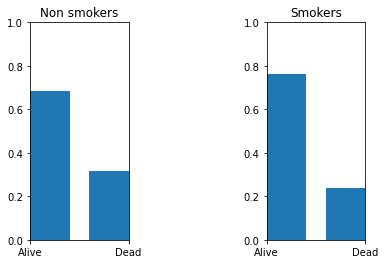

In [9]:
plt.figure()
plt.subplot(131)
plt.bar(proportion_table_svsns.index, proportion_table_svsns['No'])
plt.title('Non smokers')
#ax.set_ylabel('Scores') 
plt.axis([0,1,0,1])
plt.subplot(133)
plt.bar(proportion_table_svsns.index, proportion_table_svsns['Yes'])
plt.title('Smokers')
plt.axis([0,1, 0, 1])
plt.show()

We can clearly see the paradox because in the smoker group the proportion of alive people is greater then in the group of non smokers! The mortality ratio in non smokers is higher than in smokers. 

## Mission 2

Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge.
- On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ?
- De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.

We will begin by creating three different data frames classed by age. Then we will do a frequency table and proportion table. Following this we will present the data graphically with an hystogram. 

In [10]:
#Check first if some one is aged below 18
data[data['Age']<18] 

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Since no one is under 18 we can use the three categories and assemble their information in a new column of the *data* dataframe [Tutorial](https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/)

In [11]:
# create a list of our conditions
conditions = [
    (data['Age'] <= 34), #young category
    (data['Age'] > 34) & (data['Age'] <= 54), #adult category
    (data['Age'] > 54) & (data['Age'] <= 64), #middleage category
    (data['Age'] > 54) #senior category
    ]
# create a list of the values we want to assign for each condition
values = ['young', 'adult', 'middle age', 'senior']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Age_Class'] = np.select(conditions, values)

# display updated DataFrame
data.head()

Smoker Status   Age   Age_Class
0    Yes  Alive  21.0       young
1    Yes  Alive  19.3       young
2     No   Dead  57.5  middle age
3     No  Alive  47.1       adult
4    Yes  Alive  81.4      senior

In [12]:
#Create a frequency table using pd.crosstab with the three conditions (Smoker status, Age classes and Survival)
frequency_table_three = pd.crosstab(index=data['Smoker'], columns=[data['Age_Class'], data['Status']], margins=True )
#frequency_table_three.drop([4]) Trying to drop the total sum but not successful
frequency_table_three

Age_Class adult      middle age      senior      young        All
Status    Alive Dead      Alive Dead  Alive Dead Alive Dead      
Smoker                                                           
No          180   19         81   40     28  165   213    6   732
Yes         196   41         64   51      7   42   176    5   582
All         376   60        145   91     35  207   389   11  1314

In [13]:
#Calculate the proportion in each class
frequency_table_three = pd.crosstab(index=data['Smoker'], columns=[data['Age_Class'], data['Status']], margins=False )
##frequency_table_three = frequency_table_three.T
proportion_table_three = frequency_table_three/frequency_table_three.sum()
proportion_table_three

Age_Class     adult           middle age          senior               young  \
Status        Alive      Dead      Alive     Dead  Alive      Dead     Alive   
Smoker                                                                         
No         0.478723  0.316667   0.558621  0.43956    0.8  0.797101  0.547558   
Yes        0.521277  0.683333   0.441379  0.56044    0.2  0.202899  0.452442   

Age_Class            
Status         Dead  
Smoker               
No         0.545455  
Yes        0.454545

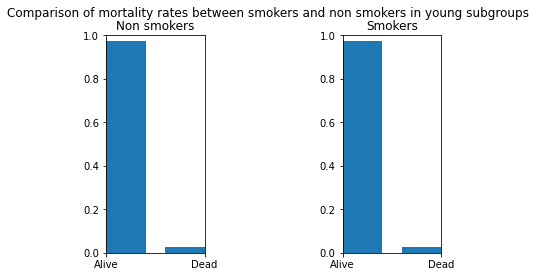

The mortality rate in young NON SMOKERS is
0.0273972602739726
The mortality rate in young SMOKERS is
0.027624309392265192


In [24]:
#For better visaulisation we shall use four separate tables for each of the Age Class and four separate histograms.
proportion_table_young = frequency_table_three['young'].T/frequency_table_three['young'].T.sum()

plt.figure()
plt.suptitle('Comparison of mortality rates between smokers and non smokers in young subgroups')

plt.subplot(131)
plt.bar(proportion_table_young.index, proportion_table_young['No'])
plt.title('Non smokers')
plt.axis([0,1,0,1])

plt.subplot(133)
plt.bar(proportion_table_young.index, proportion_table_young['Yes'])
plt.title('Smokers')
plt.axis([0,1, 0, 1])
plt.show()

print('The mortality rate in young NON SMOKERS is')
print(proportion_table_young['No']['Dead'])
print('The mortality rate in young SMOKERS is')
print(proportion_table_young['Yes']['Dead'])

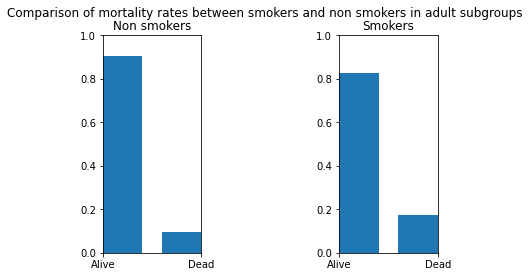

The mortality rate in adult NON SMOKERS is
0.09547738693467336
The mortality rate in adult SMOKERS is
0.1729957805907173


In [25]:
#Code for adults
proportion_table_adult = frequency_table_three['adult'].T/frequency_table_three['adult'].T.sum()

plt.figure()
plt.suptitle('Comparison of mortality rates between smokers and non smokers in adult subgroups')

plt.subplot(131)
plt.bar(proportion_table_adult.index, proportion_table_adult['No'])
plt.title('Non smokers')
plt.axis([0,1,0,1])

plt.subplot(133)
plt.bar(proportion_table_adult.index, proportion_table_adult['Yes'])
plt.title('Smokers')
plt.axis([0,1, 0, 1])
plt.show()

print('The mortality rate in adult NON SMOKERS is')
print(proportion_table_adult['No']['Dead'])
print('The mortality rate in adult SMOKERS is')
print(proportion_table_adult['Yes']['Dead'])

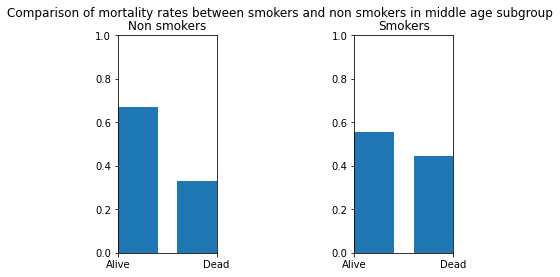

The mortality rate in middleage NON SMOKERS is
0.3305785123966942
The mortality rate in middleage SMOKERS is
0.4434782608695652


In [26]:
#For the middle age class
proportion_table_middleage =frequency_table_three['middle age'].T/frequency_table_three['middle age'].T.sum()

plt.figure()
plt.suptitle('Comparison of mortality rates between smokers and non smokers in middle age subgroup')

plt.subplot(131)
plt.bar(proportion_table_middleage.index, proportion_table_middleage['No'])
plt.title('Non smokers')
plt.axis([0,1,0,1])

plt.subplot(133)
plt.bar(proportion_table_middleage.index, proportion_table_middleage['Yes'])
plt.title('Smokers')
plt.axis([0,1, 0, 1])
plt.show()

print('The mortality rate in middleage NON SMOKERS is')
print(proportion_table_middleage['No']['Dead'])
print('The mortality rate in middleage SMOKERS is')
print(proportion_table_middleage['Yes']['Dead'])

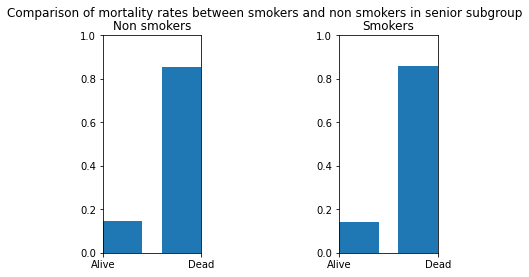

The mortality rate in senior NON SMOKERS is
0.8549222797927462
The mortality rate in senior SMOKERS is
0.8571428571428571


In [27]:
#For the middle age class
proportion_table_senior =frequency_table_three['senior'].T/frequency_table_three['senior'].T.sum()

plt.figure()
plt.suptitle('Comparison of mortality rates between smokers and non smokers in senior subgroup')

plt.subplot(131)
plt.bar(proportion_table_senior.index, proportion_table_senior['No'])
plt.title('Non smokers')
plt.axis([0,1,0,1])

plt.subplot(133)
plt.bar(proportion_table_senior.index, proportion_table_senior['Yes'])
plt.title('Smokers')
plt.axis([0,1, 0, 1])
plt.show()

print('The mortality rate in senior NON SMOKERS is')
print(proportion_table_senior['No']['Dead'])
print('The mortality rate in senior SMOKERS is')
print(proportion_table_senior['Yes']['Dead'])

The bottom line/ solution of the paradox is that **if we divide into subgroupes of age class, then the mortality rate is higher in smokers than in non smokers given a certain age class**. If we think about age we know that it is certainly a cause of mortality. In a causal diagram we shall find age as being a confounder of the effect of smoking on mortality. Meaning that *conditioning on age* will block the confounding effect. 

## Mission 3 

Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique.
- Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? 
- Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).

We shall first create the variale death that transforms Alive --> 0 and Dead --> 1. We can then look at the model Death ~ Age in smokers and non smokers to predict the effect. Finally we will represent these data graphically. 

In [31]:
# Let us repeat the same mechanism as before using the function np.select 
#(conditions, values)to add the column 'Death' to data dataframe
conditions = [data['Status'] == "Alive", data['Status'] == "Dead"]
values= [0,1]
data['Death'] = np.select(conditions, values)

To learn how to do logistic regression in python I visited this [website](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

In [36]:
#! pip install sklearn Installing necessary packages.
#! pip install seaborn
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

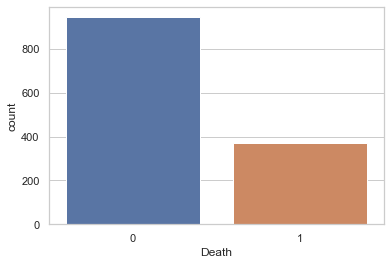

             Age
Death           
0      40.020000
1      66.155285
AxesSubplot(0.125,0.125;0.775x0.755)
Optimization terminated successfully.
         Current function value: 0.672985
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.133   
Dependent Variable: Death            AIC:              1770.6050
Date:               2020-09-16 18:51 BIC:              1775.7858
No. Observations:   1314             Log-Likelihood:   -884.30  
Df Model:           0                LL-Null:          -780.16  
Df Residuals:       1313             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
Age      -0.0080     0.0011   -7

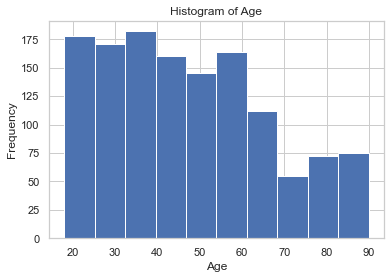

In [48]:
#Now we can study the relationship between Death (qualitative variable) and Age (quantitative variable)
#using a logistic regression

##Exploring the data: Checking the data and representing it in a histogram
data['Death'].value_counts()
sns.countplot(x='Death', data=data)
plt.show()

##Exploring the data : checking the mean of age in the two groups
print(data.groupby('Death').mean()) #By the way we can see here that the average age is different in the two subgroups: the explanation of the paradox. 
print(data['Age'].hist())#Age distribution is indeed inbalanced towards young people!
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

##Using statsmodels.api package and model
import statsmodels.api as sm
logit_model=sm.Logit(data['Death'],data['Age'])
result=logit_model.fit()
print(result.summary2())

In [55]:
data_sm

Smoker Status   Age   Age_Class  Death
0       Yes  Alive  21.0       young      0
1       Yes  Alive  19.3       young      0
4       Yes  Alive  81.4      senior      0
7       Yes   Dead  57.5  middle age      1
8       Yes  Alive  24.8       young      0
...     ...    ...   ...         ...    ...
1304    Yes  Alive  47.8       adult      0
1305    Yes  Alive  60.9  middle age      0
1307    Yes  Alive  43.0       adult      0
1309    Yes  Alive  35.9       adult      0
1311    Yes   Dead  62.1  middle age      1

[582 rows x 5 columns]

The logistic regression results indicate that Age is a protective variable overall (coefficient = -0.08) ... But what if we define two groups of smokers and non smokers ? 

In [56]:
#Logistic regression in smokers. What is the association between Death and Age in smokers ?
data_sm = data[data['Smoker']=='Yes']
logit_model=sm.Logit(data_sm['Death'],data_sm['Age'])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.633082
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.152  
Dependent Variable: Death            AIC:              738.9078
Date:               2020-09-16 18:58 BIC:              743.2743
No. Observations:   582              Log-Likelihood:   -368.45 
Df Model:           0                LL-Null:          -319.94 
Df Residuals:       581              LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
Age     -0.0154     0.0019   -7.9820   0.0000   -0.0192   -0.0116



In [57]:
#Logistic regression in smokers. What is the association between Death and Age in smokers ?
data_nonsm = data[data['Smoker']=='No'] #Selecting only the non smokers
logit_model=sm.Logit(data_nonsm['Death'],data_nonsm['Age'])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.687904
         Iterations 3
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.105   
Dependent Variable: Death            AIC:              1009.0908
Date:               2020-09-16 18:59 BIC:              1013.6866
No. Observations:   732              Log-Likelihood:   -503.55  
Df Model:           0                LL-Null:          -455.62  
Df Residuals:       731              LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     3.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
Age      -0.0038     0.0014   -2.7592   0.0058   -0.0065   -0.0011



If we followed this logic in these exemples we would conclude that age is a protective agent toward death. The older we are the less likely we will die. That is precisly what is biasing our estimate of smoke on death in our paradox. 
Now let's plot our data. We are going to see in this [link](https://realpython.com/logistic-regression-python/) how to plot a logistic regression. 